## Aula 06 - Pré-Processamento - Parte IV

Objetivos da prática:
- Verificar necessidade de pré-processamento;
- Avaliar qualidade dos dados;
- Realizar atividades de pré-processamento.



---
---

### Funções utilizadas na prática

DataFrame

- isna()

- isnull()

- sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0)

- drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

- dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

- drop_duplicates(subset=None, keep='first', inplace=False)

- fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)

- replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')


---
---


## Prática IV


---


**Caso os atributos que você escolheu nas práticas anteriores não for adequado à realização da prática, escolha outros. Por exemplo, você precisará verificar se há amostras com problemas, como valor ausente, se os atributos que você escolheu não possui valors ausentes, escolha outros atributos que tenha. Caso queira e tenha tempo você também pode para todos os atributos do conjunto de dados.**

Para cada conjunto escolhido na prática anterior, realizar as seguintes atividades:


1- Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.



2- Argumente se você acha que esses problemas têm origem sistemática ou aleatória.


3- Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.



4- Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.

Abaixo está implementada uma função que realiza a classificação/regressão para 4 modelos (reg_clas). Utilize essa função. A medida de desempenho da classificação é a acurácia (número de acertos pelo total de exemplos), e a medida da regressão é o erro quadrático médio (média da diferença ao quadrado do valor predito pelo valor real $\displaystyle \frac{\sum^n_{i=1} (y_{i \; pred} - y_{i \; real})^2}{n} \Big)$

Se você tiver problema na execução da função tente executar apenas com colunas numéricas.



In [1]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def reg_clas(data, columns, target, regression=False):
    """
    Executa classificação ou regressão do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    regression: Boleano. True para realizar uma regressão e False para classificação
    ---------------------------------------------------------------
    Realiza a classificação/regressão em 4 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, e knn com k=5)
    Plot o gráfico de desempenho para cada classificador/regressor.
    Retorna um dicionário com os classificadores/regressores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    if regression:
        svm_l = SVR(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVR(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeRegressor(criterion='mse', splitter='best', min_samples_split=int(len(data)*0.05))
        knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    else:
        svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
        knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    
    clfs = [svm_l, svm_n, dt, knn]
    clfs_names = ['svm_linear', 'svm_poly', 'dt', 'knn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[], 'knn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            if regression:
                results[c_name].append( mean_squared_error(clf.predict(x_test), y_test) )
            else:
                results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores/regressores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos regressores - erro quadrático médio' if regression else \
            'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}



In [2]:
# EXEMPLO DE CLASSIFICACAO

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

wine = datasets.load_wine()
target_names = wine['target_names']
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

target = len(wine.columns) -1
columns = list(range(target))


columns = [0,1,2]
#target = 3
dataset = wine.iloc[:, [0,1,1, target]]

print(columns)
print(target)

"""
Só precisa chamar a função reg_class com o dataset, as colunas e 
regression=True ou regression=False
"""
clf = reg_clas(wine, columns, target, regression=False)


columns = [0,1]
#target = 3
dataset = wine.iloc[:, [0,1, target]]

print(columns)
print(target)

"""
Só precisa chamar a função reg_class com o dataset, as colunas e 
regression=True ou regression=False
"""
clf = reg_clas(wine, columns, target, regression=False)

print(clf)

[0, 1, 2]
13


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


<Figure size 800x800 with 1 Axes>

[0, 1]
13


<Figure size 800x800 with 1 Axes>

{'results': {'svm_linear': [0.6944444444444444, 0.7777777777777778, 0.75, 0.8285714285714286, 0.7142857142857143], 'svm_poly': [0.7777777777777778, 0.5277777777777778, 0.2777777777777778, 0.42857142857142855, 0.5142857142857142], 'dt': [0.8888888888888888, 0.8055555555555556, 0.8055555555555556, 0.6857142857142857, 0.8285714285714286], 'knn': [0.7777777777777778, 0.8055555555555556, 0.7777777777777778, 0.7428571428571429, 0.8571428571428571]}, 'clfs': [SVC(C=1780, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), SVC(C=1780, cache_size=500, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
13


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


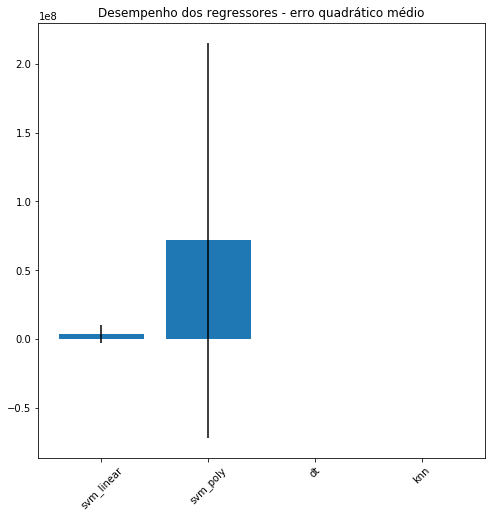

{'results': {'svm_linear': [0.2780896198564283, 1236157.975392905, 16697509.957190203, 8.127947253913336, 68095.59000852492], 'svm_poly': [742.0682409678805, 359001925.73927325, 193.49267758659335, 4416.652482585089, 296.46044074461855], 'dt': [0.08333333333333333, 0.0308641975308642, 0.09259259259259262, 0.0017857142857142857, 0.00634920634920635], 'knn': [0.3244444444444444, 0.2255555555555556, 0.2644444444444444, 0.3577142857142857, 0.22971428571428568]}, 'clfs': [SVR(C=1780, cache_size=500, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=1000000.0, shrinking=True, tol=0.001,
  verbose=False), SVR(C=1780, cache_size=500, coef0=1, degree=3, epsilon=0.1, gamma=1,
  kernel='poly', max_iter=1000000.0, shrinking=True, tol=0.001,
  verbose=False), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split

In [3]:
# EXEMPLO DE REGRESSAO

boston = datasets.load_boston()
#target_names = wine['target_names']
boston = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist() + ['target'])

target = len(wine.columns) -1
columns = list(range(target))

print(columns)
print(target)

reg = reg_clas(wine, columns, target, regression=True)

print(reg)




---
## Entrega
A entrega da prática deve ser feita em formato de notebook do jupyter. Crie um notebook seu, nas primeiras linhas identifique os membros da dupla, salve o notebook com o nome pratica_2_nUSP1_nUSP2.
Submeta no tidia apenas o arquivo do notebook .ipynb, não crie pastas para separar as práticas, apenas faça o upload do arquivo .ipynb
Não precisa fazer o upload dos datasets utilizados.
A resolução desta prática deve seguir a mesma maneira da anterior. No corpo da prática primeiro identifique qual o conjunto de dados escolhido e começe a responder as perguntas no corpo do notebook. Procure utilizar as caixas de texto para a discussão (o notebook tem caixas de texto e de código).

---




---
---
---
### Exemplo de resolução da prática


Utilizarei novo conjunto de dados

Sobre hepatite

In [5]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

types = dict( zip(
    ["AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER_BIG","LIVER_FIRM","SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY","Class"], 
    [int, np.str, str, str, str, str, str, str, str, str, str, str, str, float, float, float, float, float, str, str]))

# como no arquivo do dataset a string "?" representa o NA tive que colocar parametro na_values
hepa = pd.read_csv('./dataset_55_hepatitis.csv', dtype=types, na_values='?')

hepa.head()


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,LIVE
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,LIVE


In [6]:
hepa.STEROID
hepa.describe(include='all')

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
count,155.000000,155,154,155,154,154,154,145,144,150,150,150,150,149.000000,126.000000,151.00000,139.000000,88.000000,155,155
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,female,yes,no,yes,no,no,yes,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,no,LIVE
freq,NaN,139,78,131,100,93,122,120,84,120,99,130,132,NaN,NaN,NaN,NaN,NaN,85,123
mean,41.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427517,105.325397,85.89404,3.817266,61.852273,NaN,NaN
std,12.565878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.212149,51.508109,89.65089,0.651523,22.875244,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.00000,2.100000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,74.250000,31.50000,3.400000,46.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,58.00000,4.000000,61.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,132.250000,100.50000,4.200000,76.250000,NaN,NaN


In [7]:
# retorna boleanos em todas as colunas se for NA
hepa.isna()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False




1- Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.

As colunas PROTIME e ALK_PHOSPHATE têm a maioria dos NAs

Esse é um conjunto de dados simples e o único problema é valor ausente.
Como vocês fizeram uma análise exploratória nos conjunto de dados vocês já tem alguma ideia dos problemas e se o problema é outro além do valor ausente

In [8]:
# contando apenas os NA em algumas colunas
hepa.isna().sum() / len(hepa)

AGE                0.000000
SEX                0.000000
STEROID            0.006452
ANTIVIRALS         0.000000
FATIGUE            0.006452
MALAISE            0.006452
ANOREXIA           0.006452
LIVER_BIG          0.064516
LIVER_FIRM         0.070968
SPLEEN_PALPABLE    0.032258
SPIDERS            0.032258
ASCITES            0.032258
VARICES            0.032258
BILIRUBIN          0.038710
ALK_PHOSPHATE      0.187097
SGOT               0.025806
ALBUMIN            0.103226
PROTIME            0.432258
HISTOLOGY          0.000000
Class              0.000000
dtype: float64

2- Argumente se você acha que esses problemas têm origem sistemática ou aleatória.



3- Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.


Como a coluna PROTIME tem 43% das amostras com valor ausente escolhi por remover essa coluna.


In [9]:
# removendo coluna PROTIME
# a função drop também pode ser utilizada para remover exemplos, olhar documentação

hepa.drop(['PROTIME'], inplace=True, axis=1)



In [10]:
# copiando hepa
hepa_drop_na = hepa.copy()

# podemos remover todos exemplos ou atributos com na
# aqui removerei os exemplos com qualquer campo NA
# olhar documentação
hepa_drop_na.dropna(axis=0, how='any', inplace=True)

# podemos remover os exemplos duplicados com hepa.drop_duplicates


print(hepa_drop_na.isna().sum())
# o describe aparece com NA porque alguns campos não numéricos ele não consegue calcular a média ...
hepa_drop_na.describe(include='all')



AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Class              0
dtype: int64


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
count,112.000000,112,112,112,112,112,112,112,112,112,112,112,112,112.000000,112.000000,112.000000,112.000000,112,112
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,2
top,NaN,female,yes,no,yes,no,no,yes,no,no,no,no,no,NaN,NaN,NaN,NaN,no,LIVE
freq,NaN,99,58,90,73,70,93,90,58,92,74,98,98,NaN,NaN,NaN,NaN,65,93
mean,41.196429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.272321,105.491071,78.616071,3.834821,NaN,NaN
std,12.150586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886252,53.295707,68.761010,0.576368,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.000000,2.100000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,72.000000,30.000000,3.500000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,56.500000,4.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,133.500000,98.000000,4.200000,NaN,NaN


In [11]:
# copiando hepa
hepa_fill_na1 = hepa.copy()
hepa_fill_na2 = hepa.copy()
hepa_fill_na3 = hepa.copy()

# ao invés de remover podemos substituir os NAs com fillna, olhar documentação

# substitui NA por 0
hepa_fill_na1.fillna(value=0, axis=0, inplace=True)
# substitui NA pela média do atributo
hepa_fill_na2.fillna(value=hepa.mean(), axis=0, inplace=True)
# substitui NA pela mediana do atributo
hepa_fill_na3.fillna(value=hepa.median(), axis=0, inplace=True)

print('Mediana')
print(hepa.median())
print()

print(hepa_fill_na3.isnull().sum())
hepa_fill_na3.describe(include='all')



Mediana
AGE              39.0
BILIRUBIN         1.0
ALK_PHOSPHATE    85.0
SGOT             58.0
ALBUMIN           4.0
dtype: float64

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           0
ALK_PHOSPHATE       0
SGOT                0
ALBUMIN             0
HISTOLOGY           0
Class               0
dtype: int64


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
count,155.000000,155,154,155,154,154,154,145,144,150,150,150,150,155.000000,155.000000,155.000000,155.000000,155,155
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,2
top,NaN,female,yes,no,yes,no,no,yes,no,no,no,no,no,NaN,NaN,NaN,NaN,no,LIVE
freq,NaN,139,78,131,100,93,122,120,84,120,99,130,132,NaN,NaN,NaN,NaN,85,123
mean,41.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.410968,101.522581,85.174194,3.836129,NaN,NaN
std,12.565878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.191178,47.082042,88.590122,0.619267,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.000000,2.100000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,78.000000,32.500000,3.500000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,58.000000,4.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,119.500000,99.000000,4.200000,NaN,NaN


In [12]:
hepa.mode(axis=0)

# utilizaremos a moda, mas apenas a primeira linha 

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
0,30,female,yes,no,yes,no,no,yes,no,no,no,no,no,1.0,85.0,20.0,4.0,no,LIVE
1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

# como a função mediana só funciona para valores numéricos não foi possível substituir todas as colunas
# mas como agora só sobraram as colunas categoricas com NA, podemos utilizar a moda
hepa_fill_na2.fillna(value=hepa.mode(axis=0).iloc[0, :], axis=0, inplace=True)
hepa_fill_na3.fillna(value=hepa.mode(axis=0).iloc[0, :], axis=0, inplace=True)


print(hepa_fill_na3.isna().sum())
hepa_fill_na3.describe(include='all')

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Class              0
dtype: int64


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
count,155.000000,155,155,155,155,155,155,155,155,155,155,155,155,155.000000,155.000000,155.000000,155.000000,155,155
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,2
top,NaN,female,yes,no,yes,no,no,yes,no,no,no,no,no,NaN,NaN,NaN,NaN,no,LIVE
freq,NaN,139,79,131,101,94,123,130,95,125,104,135,137,NaN,NaN,NaN,NaN,85,123
mean,41.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.410968,101.522581,85.174194,3.836129,NaN,NaN
std,12.565878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.191178,47.082042,88.590122,0.619267,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.000000,2.100000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,78.000000,32.500000,3.500000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,58.000000,4.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,119.500000,99.000000,4.200000,NaN,NaN


4- Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.

Como pode ser visto abaixo, o mesmo modelo de classificador obteve resultado diferente para as diferentes maneiras que tratamos o NA.
Para os classificadores selecionados não foi possível executar com NA presente no dataset.

Dependendo do seu problema você pode apenas substituir o NA por zero, mas é preciso ter alguma justificativa para tal.
Na maioria das vezes é difícil explicar o porque dessa substituição, pelo menos de maneira geral em todas as colunas, pode ser que para alguma coluna isso faça sentido.
Por isso também podemos substituir o NA pela média, mediana ou outra medida que você achar mais adequada ao seu problema.

In [16]:
data = hepa_drop_na
target = data.shape[1] -1
columns = list(range(target))
reg_clas(data, columns, target, regression=False)

# deu problema nas colunas não numéricas, então só vou trabalhar com as colunas numéricas

ValueError: could not convert string to float: 'yes'

In [15]:
data = hepa
target = data.shape[1] -1
columns = [0, 13, 14, 15, 16]
reg_clas(data, columns, target, regression=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


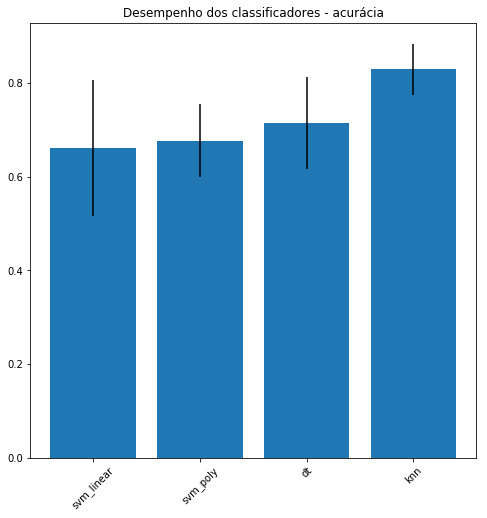

In [17]:
data = hepa_drop_na
target = data.shape[1] -1
columns = [0, 13, 14, 15, 16]
res = reg_clas(data, columns, target, regression=False)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


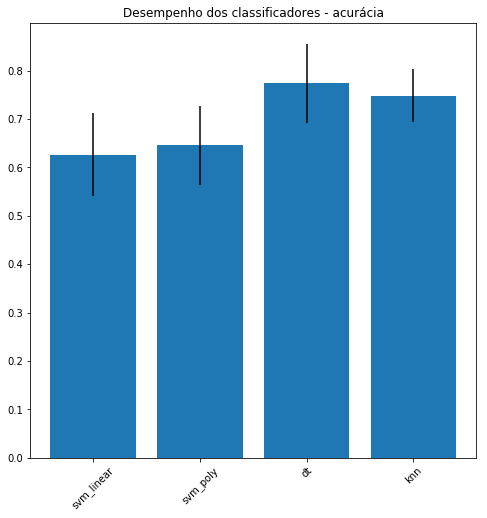

In [18]:
data = hepa_fill_na1
target = data.shape[1] -1
columns = [0, 13, 14, 15, 16]
res1 = reg_clas(data, columns, target, regression=False)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


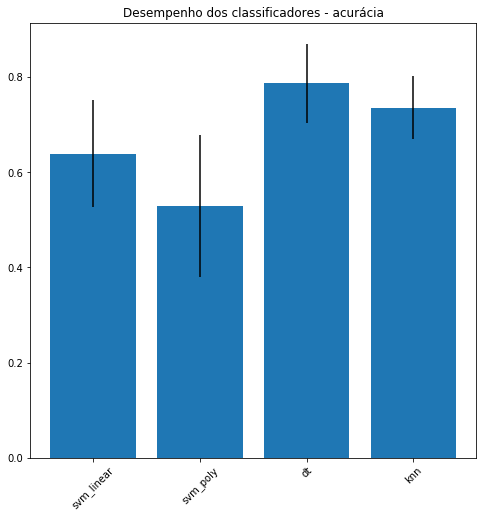

In [19]:
data = hepa_fill_na2
target = data.shape[1] -1
columns = [0, 13, 14, 15, 16]
res2 = reg_clas(data, columns, target, regression=False)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


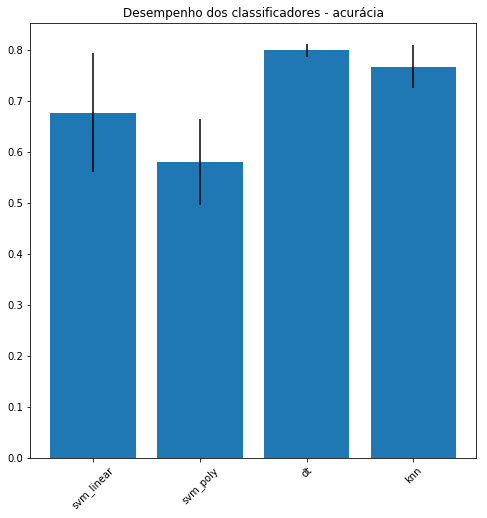

In [20]:
data = hepa_fill_na3
target = data.shape[1] -1
columns = [0, 13, 14, 15, 16]
res3 = reg_clas(data, columns, target, regression=False)